In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
len(x_train)

60000

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

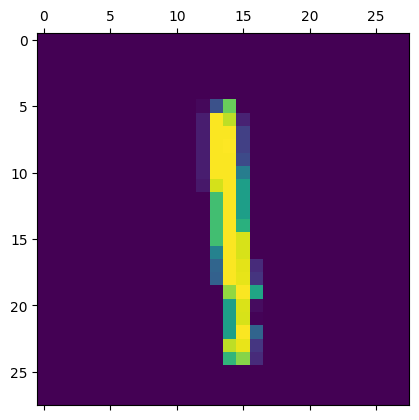

In [11]:
plt.matshow(x_train[8])

In [12]:
y_train[8]

1

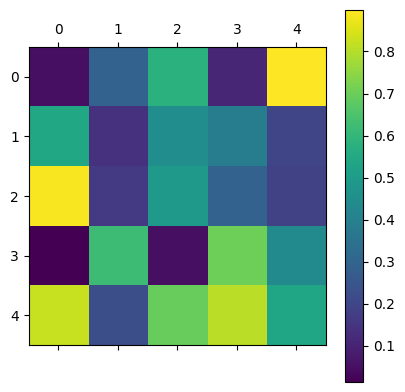

In [13]:

matrix = np.random.rand(5, 5)  # Random 5x5 matrix

plt.matshow(matrix, cmap='viridis')  # Display matrix with a colormap
plt.colorbar()  # Show color scale
plt.show()


In [14]:
x_train_flatten=x_train.reshape(len(x_train),28*28)

In [15]:
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [16]:
x_train_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# LOSS Function
A loss function in machine learning and deep learning measures how well a model's predictions match the actual target values. It quantifies the difference between the predicted output and the ground truth, guiding the model's optimization process. The goal is to minimize this loss to improve accuracy.



### 🔹 **For Regression (Continuous Output)**
| Loss Function         | When to Use | Pros | Cons |
|----------------------|------------|------|------|
| **MSE (Mean Squared Error)** | General regression problems | Penalizes large errors more, smooth gradients | Sensitive to outliers |
| **MAE (Mean Absolute Error)** | When outliers are present | Less sensitive to outliers | Can lead to slower convergence |
| **Huber Loss** | Mix of MSE & MAE, handles outliers well | Balances sensitivity & robustness | Needs a threshold parameter (δ) |

**Best Choice?**
- Use **MSE** if large errors matter more.
- Use **MAE** if your data has many outliers.
- Use **Huber Loss** if you need a balance.

---

### 🔹 **For Classification**
| Loss Function | When to Use | Pros | Cons |
|--------------|------------|------|------|
| **Binary Cross-Entropy** | Binary classification (e.g., spam detection) | Works well with sigmoid activation | Requires probability outputs |
| **Categorical Cross-Entropy** | Multi-class classification (one-hot labels) | Best for multi-class problems | Needs one-hot encoding |
| **Sparse Categorical Cross-Entropy** | Multi-class classification (integer labels) | Avoids one-hot encoding | Labels must be integers |
| **Hinge Loss** | SVM-based models | Good for margin-based classification | Not common in neural networks |

**Best Choice?**
- Use **Binary Cross-Entropy** for binary classification.
- Use **Categorical Cross-Entropy** for multi-class classification.
- Use **Sparse Categorical Cross-Entropy** if your labels are **not one-hot encoded**.